# Tutorial: Mixture Model

Agenda:

1. Multivariate Gaussian
2. Maximum Likelihood estimation of the mean parameter
3. Bayesian estimation of the mean parameter
4. Expectation Maximization for multivariate Gaussian mixture

References:

* http://www.eecs.yorku.ca/course_archive/2012-13/F/4404-5327/lectures/03%20Multivariate%20Normal%20Distribution.pdf
(Slides 6, 9, 41-42, 44-52)
* http://disi.unitn.it/~passerini/teaching/2010-2011/MachineLearning/slides/06_07_bayesian_learning/talk.pdf
* http://stats.stackexchange.com/questions/28744/multivariate-normal-posterior
* http://cs.nyu.edu/~dsontag/courses/ml12/slides/lecture21.pdf
* http://statweb.stanford.edu/~tibs/stat315a/LECTURES/em.pdf (a little advanced)

In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1.  Multivariate Gaussian

$$ p(x ; \mu, \Sigma) = \frac{1}{(2\pi)^{D/2} | \Sigma | ^{1/2}} \exp \left( -\frac{1}{2} (x-\mu)^T \Sigma^{-1} (x-\mu) \right) $$

Compared to univariate Gaussian:

$$ p(x; \mu, \sigma^2) = \frac{1}{\sqrt{ 2 \pi} \sigma} \exp \left( -\frac{1}{2\sigma^2} (x-\mu)^2 \right) $$

In [93]:
mean1 = [1.0, 2.0]
cov1 = [[1.0, 0.5],
        [1.0, 1.0]]
data1 = np.random.multivariate_normal(mean1, cov1, size=200)

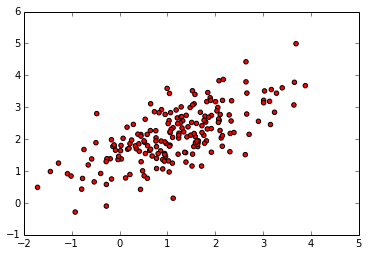

In [94]:
plt.scatter(data1[:,0], data1[:,1],c='r')

In [95]:
mean2 = [1.5, 0.0]
cov2 = [[ 1.0, -0.5],
        [-0.5,  1.5]]
data2 = np.random.multivariate_normal(mean2, cov2, size=200)

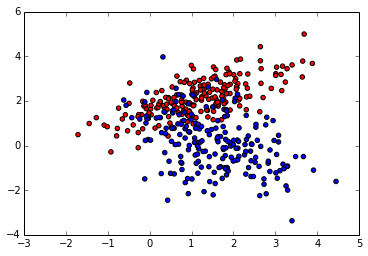

In [97]:
plt.scatter(data1[:,0], data1[:,1], c='r')
plt.scatter(data2[:,0], data2[:,1], c='b')

## 2. Maximum Likelihood for Mean Parameter

$$\log  p(x_1, ..., x_N| \mu, \Sigma) = -\frac{ND}{2}log(2\pi) - \frac{N}{2} \log |\Sigma| - \frac{1}{2}\sum_n (x_n - \mu)^T \Sigma^{-1} (x_n - \mu)$$

Take derivative with respect to $\mu$ to get:

$$\frac{\partial}{\partial \mu} \log p = \sum_n \Sigma^{-1} (x_n-\mu)$$

So

$$\mu_{ML} = \frac{1}{N} \sum_n x_n $$

Just like in the univariate case.


Switch to:
http://www.eecs.yorku.ca/course_archive/2012-13/F/4404-5327/lectures/03%20Multivariate%20Normal%20Distribution.pdf

## 3. Bayesian Estimatiof Mean Parameter

From: http://stats.stackexchange.com/questions/28744/multivariate-normal-posterior

By Bayes's rule the posterior distribution looks like:

$$p(\mu| \{\mathbf x_i\}) \propto  p(\mu) \prod_{i=1}^N p(\mathbf x_i | \mu)$$
 
So:

$$\ln p(\mu| \{\mathbf x_i\}) = -\frac{1}{2}\sum_{i=1}^N(\mathbf x_i - \mu)'\mathbf \Sigma^{-1}(\mathbf x_i - \mu) -\frac{1}{2}(\mu - \mu_0)'\mathbf \Sigma_0^{-1}(\mu - \mu_0) + const$$

$$ = -\frac{1}{2} N \mu' \mathbf \Sigma^{-1} \mu + \sum_{i=1}^N \mu' \mathbf \Sigma^{-1}  \mathbf x_i -\frac{1}{2} \mu' \mathbf \Sigma_0^{-1} \mu + \mu' \mathbf \Sigma_0^{-1} \mu_0 + const$$

$$ = -\frac{1}{2} \mu' (N \mathbf \Sigma^{-1} + \mathbf \Sigma_0^{-1}) \mu + \mu' (\mathbf \Sigma_0^{-1} \mu_0 + \mathbf \Sigma^{-1} \sum_{i=1}^N \mathbf x_i) + const$$

$$= -\frac{1}{2}(\mu - (N \mathbf \Sigma^{-1} + \mathbf \Sigma_0^{-1})^{-1}(\mathbf \Sigma_0^{-1} \mu_0 + \mathbf \Sigma^{-1} \sum_{i=1}^N \mathbf x_i))' \\
(N \mathbf \Sigma^{-1} + \mathbf \Sigma_0^{-1}) (\mu - (N \mathbf \Sigma^{-1} + \mathbf \Sigma_0^{-1})^{-1}(\mathbf \Sigma_0^{-1} \mu_0 + \mathbf \Sigma^{-1} \sum_{i=1}^N \mathbf x_i)) + const$$


Which is the log density of a Gaussian:

$$\mu| \{\mathbf x_i\} \sim N((N \mathbf \Sigma^{-1} + \mathbf \Sigma_0^{-1})^{-1}(\mathbf \Sigma_0^{-1} \mu_0 + \mathbf \Sigma^{-1} \sum_{i=1}^N \mathbf x_i), (N \mathbf \Sigma^{-1} + \mathbf \Sigma_0^{-1})^{-1})$$

Using the Woodbury identity on our expression for the covariance matrix:

$$(N \mathbf \Sigma^{-1} + \mathbf \Sigma_0^{-1})^{-1} = \mathbf \Sigma(\frac{1}{N} \mathbf \Sigma + \mathbf \Sigma_0)^{-1} \frac{1}{N} \mathbf \Sigma_0$$

Which provides the covariance matrix in the desired form. Using this expression (and its symmetry) further in the expression for the mean we have:

$$\mathbf \Sigma(\frac{1}{N} \mathbf \Sigma + \mathbf \Sigma_0)^{-1} \frac{1}{N} \mathbf \Sigma_0 \mathbf \Sigma_0^{-1} \mu_0 
+  
\frac{1}{N} \mathbf \Sigma_0(\frac{1}{N} \mathbf \Sigma + \mathbf \Sigma_0)^{-1}  \mathbf \Sigma \mathbf \Sigma^{-1} \sum_{i=1}^N \mathbf x_i$$

$$= \mathbf \Sigma(\frac{1}{N} \mathbf \Sigma + \mathbf \Sigma_0)^{-1} \frac{1}{N} \mu_0 
+ \mathbf \Sigma_0(\frac{1}{N} \mathbf \Sigma + \mathbf \Sigma_0)^{-1} \sum_{i=1}^N (\frac{1}{N} \mathbf x_i)$$

Which is the form required for the mean.

$$
\begin{array}{rcl} \bf \mu_n &=& \displaystyle\Sigma_0 \left(\Sigma_0 + \frac{1}{n}\Sigma\right)^{-1}\left(\frac{1}{n}\sum_{i=1}^{n}{\bf x_i}\right) + \frac{1}{n}\Sigma\left(\Sigma_0+\frac{1}{n}\Sigma\right)^{-1}\mu_0 \\
\bf \Sigma_n & =&\displaystyle \Sigma_0\left(\Sigma_0 + \frac{1}{n}\Sigma\right)^{-1}\frac{1}{n}\Sigma
\end{array}$$


## 4. Expectation Maximization

Fit a mixture (of Gaussians) by alternating between two steps:

    * Expectation: Compute posterior expectations of latent variable z
    * Maximization: Solve ML parameters given full set of x's and z's

http://www.cs.toronto.edu/~rgrosse/courses/csc321_2017/slides/lec18.pdf

In [5]:
from sklearn import datasets
iris = datasets.load_iris()

In [6]:
#print iris['DESCR'] # commented to prevent cutoff

In [15]:
iris_data = iris['data'][:,[1,3]]
target = iris['target']

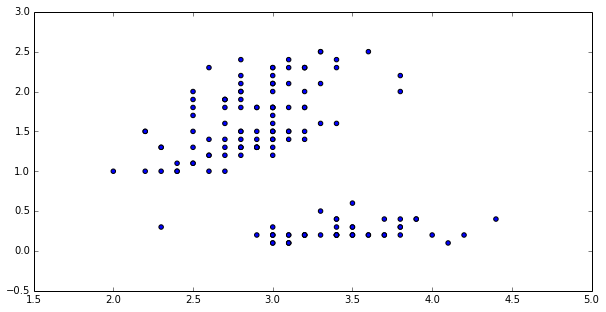

In [42]:
plt.figure(figsize=(10,5))
plt.scatter(iris_data[:,0], iris_data[:, 1]) #, c=target)

In [97]:
from matplotlib.colors import LogNorm
from sklearn import mixture

def plot_clf(clf, input_data, max_iter=0):
    # display predicted scores by the model as a contour plot
    x = np.linspace(1.5, 5.0)
    y = np.linspace(-0.5, 3.0)
    X, Y = np.meshgrid(x, y)
    XX = np.array([X.ravel(), Y.ravel()]).T
    Z = -clf.score_samples(XX)
    Z = Z.reshape(X.shape)

    plt.figure(figsize=(10,5))
    CS = plt.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0),
                     levels=np.logspace(0, 3, 10))
    CB = plt.colorbar(CS, shrink=0.8, extend='both')
    plt.scatter(input_data[:, 0], input_data[:, 1], c=clf.predict(input_data))
    plt.title('Negative log-likelihood predicted by a GMM')
    plt.axis('tight')

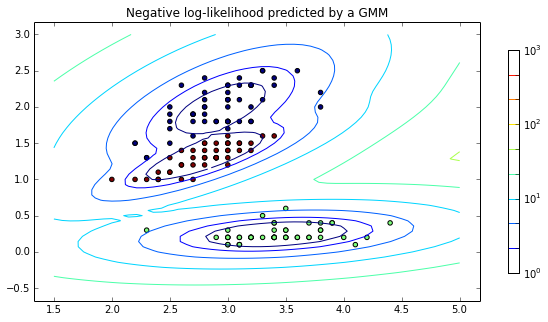

In [114]:
# fit a Gaussian Mixture Model with two components
clf = mixture.GaussianMixture(n_components=3, covariance_type='full')
clf.fit(iris_data)
plot_clf(clf, iris_data)

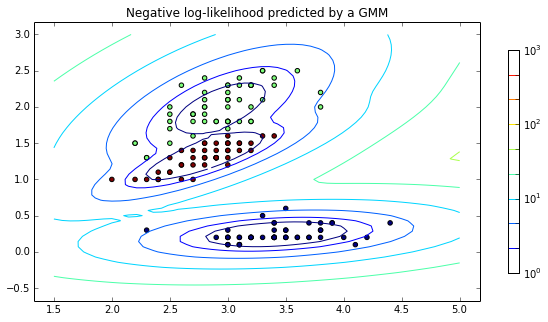

In [102]:
# Run again: same result or different?
clf = mixture.GaussianMixture(n_components=3, covariance_type='full')
clf.fit(iris_data)
plot_clf(clf, iris_data)

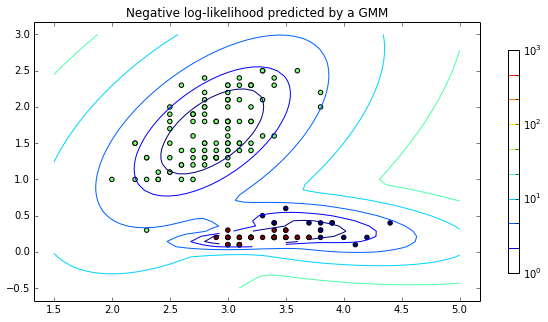

In [99]:
# Example of a degenerate case
np.random.seed(2)
clf = mixture.GaussianMixture(n_components=3, covariance_type='full')
clf.fit(iris_data)
plot_clf(clf, iris_data)

In [145]:
# plt.hist(iris['data'][:,2], bins=20)

Expectation Maximization Demo:

https://www.youtube.com/watch?v=v-pq8VCQk4M